# JS04 - TUGAS K-MEANS

In [ ]:
# Persiapan data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

file_id = "1e1Jc85tkyY_eSvioeURlWILy3_G87zz2"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


k optimal:


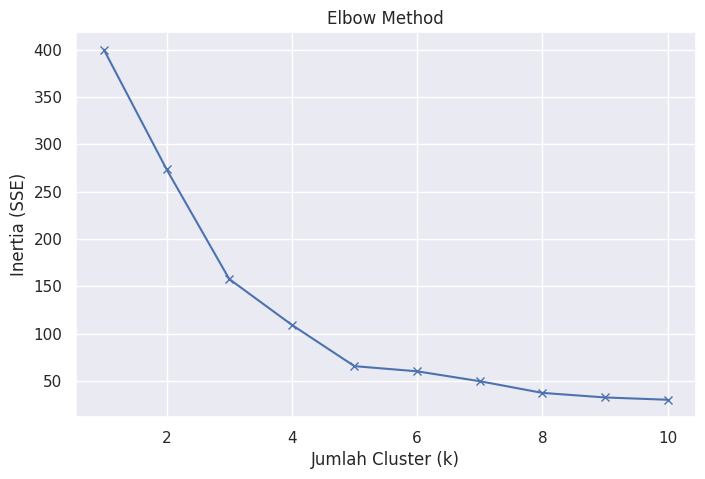


Hasil Clustering:


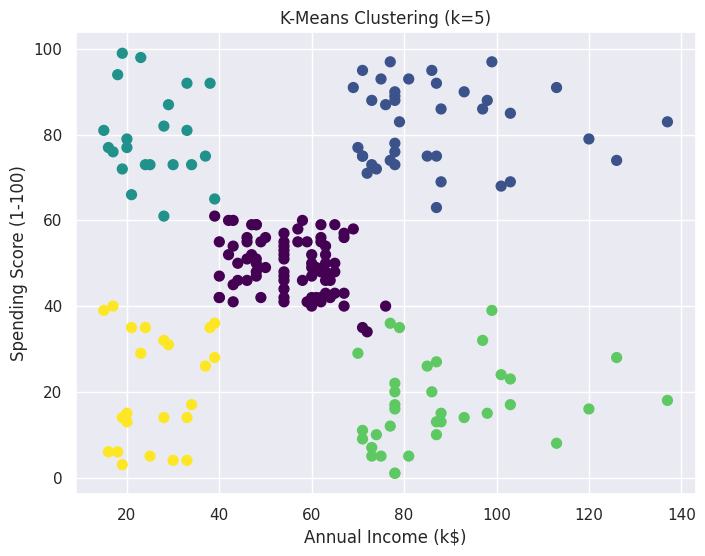

In [ ]:
# Menentukan fitur untuk melakukan clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menggunakan Elbow Method untuk mencari k optimal
print('k optimal:')
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.show()

# Buat model K-Means dengan k terbaik
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
print('\nHasil Clustering:')
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={best_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# JS04 - TUGAS DBSCAN

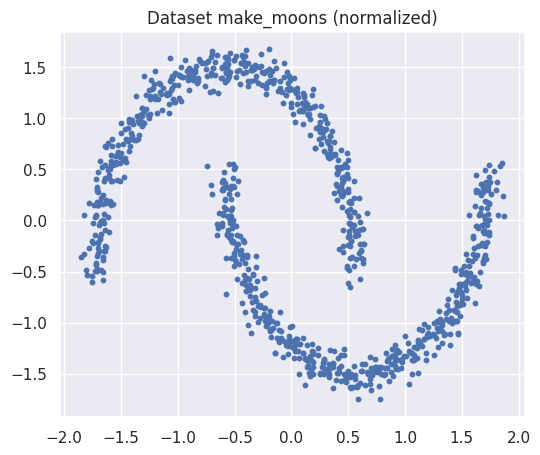

In [ ]:
# Poin 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Buat dataset
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi (standarisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualisasi dataset asli
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], s=10)
plt.title("Dataset make_moons (normalized)")
plt.show()

In [ ]:
# Poin 2 dan 3
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Fungsi bantu untuk evaluasi
def evaluate_dbscan(labels, X):
    # noise diberi label -1 oleh DBSCAN
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Jumlah cluster: {n_clusters}")
    print(f"Jumlah noise: {n_noise}")

    if n_clusters > 0:
        print(f"Homogeneity: {metrics.homogeneity_score(y_true, labels):.3f}")
        print(f"Completeness: {metrics.completeness_score(y_true, labels):.3f}")
        print(f"V-measure: {metrics.v_measure_score(y_true, labels):.3f}")
        print(f"ARI: {metrics.adjusted_rand_score(y_true, labels):.3f}")
        print(f"AMI: {metrics.adjusted_mutual_info_score(y_true, labels):.3f}")

        # Silhouette hanya dihitung jika lebih dari 1 cluster dan tanpa semua noise
        if len(set(labels)) > 1:
            mask = labels != -1
            if np.unique(labels[mask]).size > 1:
                print(f"Silhouette: {metrics.silhouette_score(X[mask], labels[mask]):.3f}")
    print("-"*50)

# Jalankan DBSCAN dasar
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

evaluate_dbscan(labels, X_scaled)

Jumlah cluster: 2
Jumlah noise: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
ARI: 1.000
AMI: 1.000
Silhouette: 0.391
--------------------------------------------------


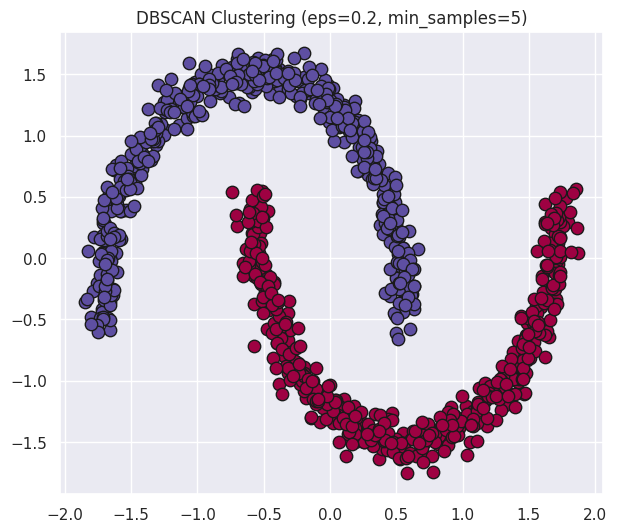

In [ ]:
# Poin 4
# Mask core samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(7,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = warna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=80, c=[col], marker='o', edgecolors='k')

    # Non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=30, c=[col], marker='.')

plt.title("DBSCAN Clustering (eps=0.2, min_samples=5)")
plt.show()

In [ ]:
# Poin 5
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for min_s in min_samples_values:
        print(f"=== eps={eps}, min_samples={min_s} ===")
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        labels = dbscan.fit_predict(X_scaled)
        evaluate_dbscan(labels, X_scaled)

=== eps=0.05, min_samples=3 ===
Jumlah cluster: 69
Jumlah noise: 186
Homogeneity: 0.816
Completeness: 0.153
V-measure: 0.257
ARI: 0.030
AMI: 0.244
Silhouette: 0.349
--------------------------------------------------
=== eps=0.05, min_samples=10 ===
Jumlah cluster: 3
Jumlah noise: 970
Homogeneity: 0.031
Completeness: 0.127
V-measure: 0.049
ARI: 0.002
AMI: 0.046
Silhouette: 0.881
--------------------------------------------------
=== eps=0.05, min_samples=20 ===
Jumlah cluster: 0
Jumlah noise: 1000
--------------------------------------------------
=== eps=0.1, min_samples=3 ===
Jumlah cluster: 2
Jumlah noise: 14
Homogeneity: 0.986
Completeness: 0.903
V-measure: 0.943
ARI: 0.972
AMI: 0.943
Silhouette: 0.394
--------------------------------------------------
=== eps=0.1, min_samples=10 ===
Jumlah cluster: 7
Jumlah noise: 57
Homogeneity: 0.943
Completeness: 0.410
V-measure: 0.571
ARI: 0.523
AMI: 0.570
Silhouette: 0.210
--------------------------------------------------
=== eps=0.1, min_sam

# JS04 - IMPLEMENTASI K-MEANS PADA DATASET DARI JURNAL

 Contoh data agregasi per pelanggan:
   CustomerID  NumTransactions  TotalQuantity  TotalSpent
0       12346                2              0        0.00
1       12347                7           2458     4310.00
2       12348                4           2341     1797.24
3       12349                1            631     1757.55
4       12350                1            197      334.40


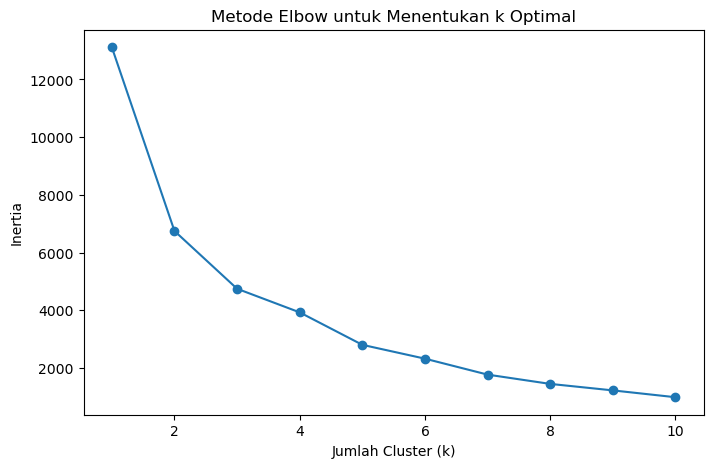


 Jumlah pelanggan per cluster:
Cluster
0    4149
3     207
1       9
2       7
Name: count, dtype: int64

 Contoh hasil clustering:
   CustomerID  NumTransactions  TotalQuantity  TotalSpent  Cluster
0       12346                2              0        0.00        0
1       12347                7           2458     4310.00        0
2       12348                4           2341     1797.24        0
3       12349                1            631     1757.55        0
4       12350                1            197      334.40        0


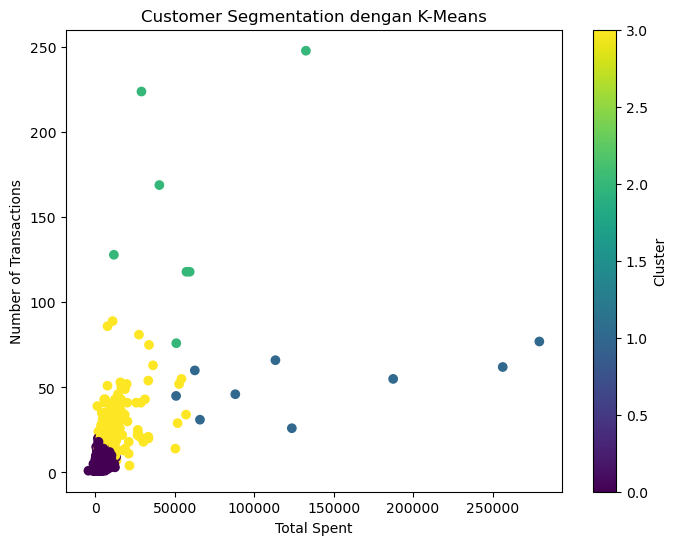

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset dari Google Drive
file_id = "1mahj5xUXuKu6wsmDIZmyy4Ad-rYkv1Bk"  # ganti dengan file ID milikmu
url = f"https://drive.google.com/uc?id={file_id}"

# encoding='ISO-8859-1' digunakan untuk mengatasi error karakter spesial (£, dll)
df = pd.read_csv(url, encoding='ISO-8859-1')

# Hapus baris yang CustomerID-nya kosong (karena kita akan agregasi per pelanggan)
df = df.dropna(subset=['CustomerID'])

# Pastikan CustomerID berupa int
df['CustomerID'] = df['CustomerID'].astype(int)

# Buat kolom TotalPrice = Quantity × UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Agregasi per CustomerID
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',      # Jumlah transaksi unik
    'Quantity': 'sum',          # Total jumlah barang dibeli
    'TotalPrice': 'sum'         # Total uang yang dibelanjakan
}).reset_index()

customer_df.rename(columns={
    'InvoiceNo': 'NumTransactions',
    'Quantity': 'TotalQuantity',
    'TotalPrice': 'TotalSpent'
}, inplace=True)

print(" Contoh data agregasi per pelanggan:")
print(customer_df.head())

# Normalisasi fitur
features = ['NumTransactions', 'TotalQuantity', 'TotalSpent']
scaler = StandardScaler()
X = scaler.fit_transform(customer_df[features])

# Tentukan jumlah cluster optimal dengan metode Elbow
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

# Misalnya kita pilih k = 4 (setelah lihat grafik elbow)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X)

# Lihat hasil clustering
print("\n Jumlah pelanggan per cluster:")
print(customer_df['Cluster'].value_counts())

print("\n Contoh hasil clustering:")
print(customer_df.head())

#  Visualisasi 2D (TotalSpent vs NumTransactions)
plt.figure(figsize=(8,6))
plt.scatter(customer_df['TotalSpent'], customer_df['NumTransactions'],
            c=customer_df['Cluster'], cmap='viridis')
plt.xlabel('Total Spent')
plt.ylabel('Number of Transactions')
plt.title('Customer Segmentation dengan K-Means')
plt.colorbar(label='Cluster')
plt.show()